In [31]:
# The code above reads the data, preprocesses it, trains a RandomForestClassifier, 
# and evaluates the model's performance using various metrics. 
# It also plots the feature importance, helping us identify the most important features for fraud detection.

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt

In [33]:
# Load data from CSV
data = pd.read_csv('/Users/manshusharma/Documents/vscode/Fraudulent Transactions/Fraud.csv')


In [34]:
# Check for null values
data.isnull().values.any()

False

In [35]:
# Getting information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [36]:
# Data Preprocessing
# Drop unnecessary columns
data.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

In [37]:
# One-hot encoding for 'type' column
data = pd.get_dummies(data, columns=['type'], drop_first=True)

In [38]:
# Feature Engineering
data['balance_change'] = data['newbalanceOrig'] - data['oldbalanceOrg']

In [39]:
# Prepare data for model training
X = data.drop(['isFraud'], axis=1)
y = data['isFraud']

In [40]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Model Training
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [42]:
# By looking at these evaluation metrics, We can assess the model's performance in different aspects:

# Accuracy: Overall, how often the model correctly predicts fraud and non-fraud transactions.
# Precision: The proportion of predicted fraud transactions that are actually fraud (true positive rate).
# Recall: The proportion of actual fraud transactions that the model correctly identifies (sensitivity or true negative rate).
# F1 Score: The harmonic mean of precision and recall, which balances between precision and recall.
# ROC-AUC Score: The area under the receiver operating characteristic curve, which measures the model's ability to distinguish between fraud and non-fraud transactions.


In [43]:
# Model Evaluation
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

In [44]:
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9997


In [45]:
print(f"Precision: {precision:.4f}")

Precision: 0.9769


In [46]:
print(f"Recall: {recall:.4f}")

Recall: 0.8105


In [47]:
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.8860


In [48]:
print(f"ROC-AUC Score: {roc_auc:.4f}")

ROC-AUC Score: 0.9965


In [49]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1270873      31]
 [    307    1313]]


In [50]:
# Feature Importance
feature_importance = rf_model.feature_importances_
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_features = X_train.columns[sorted_indices]

In [51]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Feature importance is a measure of how much each feature contributes to the model's decision-making process. 
# It helps us understand which features are more influential in making predictions.

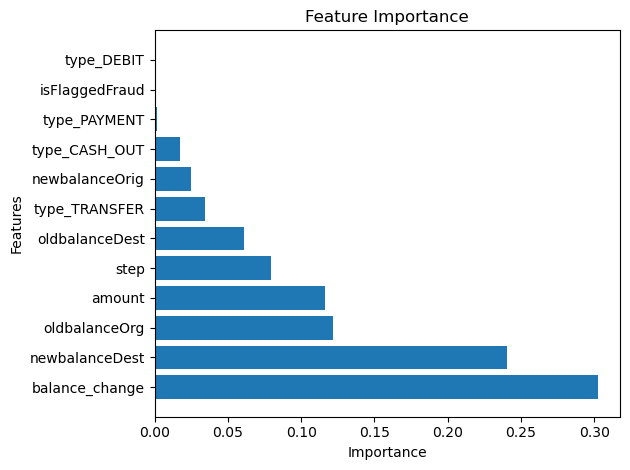

In [52]:
plt.barh(sorted_features, feature_importance[sorted_indices])
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()